In this notebook I'm trying to process VIDTIMIT dataset with syncnet model, and classify videos as real or fake.

In [40]:
# importing libraries

import os
import numpy as np
import pandas as pd
import zipfile
import cv2
import h5py
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.layers import Flatten, Dense
from os import listdir
from os.path import isfile, join
import sys
import dlib
import moviepy.editor as mpy
import wave
import contextlib

In [41]:
pip install speechpy

In [3]:
import speechpy
import scipy.io.wavfile as wav

In [4]:
# mounting drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# zipping/unzipping the VIDTIMIT Dataset folder

http://conradsanderson.id.au/vidtimit/

In [ ]:
# zipped vidtimit files
path = '/content/gdrive/My Drive/second_case_study_FILES'

data_files = os.listdir(path)
len(data_files)

43

In [ ]:
# unzipping all the zip files 

for i in data_files:
  with zipfile.ZipFile('/content/gdrive/My Drive/second_case_study_FILES/'+i, 'r') as zip_ref:
    zip_ref.extractall('/content/gdrive/My Drive/VIDTIMIT/')


In [ ]:
# unzipped audios and images for 43 users
data_files = os.listdir('/content/gdrive/My Drive/VIDTIMIT')
len(data_files)


43

# creating videos

In [ ]:
# https://stackoverflow.com/questions/30008859/how-to-create-a-video-with-raw-images-rgb-format-and-add-audio-to-it-in-pytho
# https://stackoverflow.com/questions/7833807/get-wav-file-length-or-duration
# https://zulko.github.io/moviepy/getting_started/getting_started.html
# https://theailearner.com/2018/10/15/creating-video-from-images-using-opencv-python/

import glob


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)696320/45929032 bytes (1.5%)1982464/45929032 bytes (4.3%)3842048/45929032 bytes (8.4%)6504448/45929032 bytes (14.2%)10084352/45929032 bytes (22.0%)13393920/45929032 bytes (29.2%)16990208/45929032 bytes (37.0%)20709376/45929032 bytes (45.1%)24502272/45929032 bytes (53.3%)28205056/45929032 bytes (61.4%)31719424/45929032 bytes (69.1%)35356672/45929032 bytes (77.0%)3899392

## creating non-tampered videos

We have total 43 users, and each user has 10 audios with respective frames. So we can create 430 non-tampered videos.

In [ ]:
c=0
for i in data_files:
  # i represents user
  c=c+1
  print('file num',c,i)
  files=os.listdir('/content/gdrive/My Drive/VIDTIMIT/'+i+'/audio')
  for j in files:
    # j represents audio file
    
    with contextlib.closing(wave.open('/content/gdrive/My Drive/VIDTIMIT/'+str(i)+'/audio/'+j,'r')) as f:
      frames = f.getnframes()
      rate = f.getframerate()
      duration = frames / float(rate)
      #print(duration)
      
    t = j.split('.')[0]
    p = '/content/gdrive/My Drive/VIDTIMIT/'+i+'/video'
    if t in os.listdir(p):
        temp = os.listdir('/content/gdrive/My Drive/VIDTIMIT/'+i+'/video/'+t)
        frames = len(temp)
        fps = frames/duration
        img_array = []
        for filename in glob.glob('/content/gdrive/My Drive/VIDTIMIT/'+i+'/video/'+t+'/*'):
            img = cv2.imread(filename)
            height, width, layers = img.shape
            size = (width,height)
            img_array.append(img)
        out = cv2.VideoWriter('/content/gdrive/My Drive/vidtimit_videos/non_tampered/'+i+'_'+t+'.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
        for k in range(len(img_array)):
          out.write(img_array[k])
        out.release()

file num 1 faks0
file num 2 fcft0
file num 3 fcmh0
file num 4 fdac1
file num 5 fdms0
file num 6 fcmr0
file num 7 fdrd1
file num 8 fedw0
file num 9 fcrh0
file num 10 felc0
file num 11 fjas0
file num 12 fjem0
file num 13 fgjd0
file num 14 fjre0
file num 15 fpkt0
file num 16 fjwb0
file num 17 fkms0
file num 18 fram1
file num 19 mbdg0
file num 20 mabw0
file num 21 mcem0
file num 22 mbjk0
file num 23 mccs0
file num 24 mgwt0
file num 25 mdbb0
file num 26 mjar0
file num 27 mdab0
file num 28 mdld0
file num 29 mjsw0
file num 30 mmdb1
file num 31 mpgl0
file num 32 mmdm2
file num 33 mpdf0
file num 34 mreb0
file num 35 msjs1
file num 36 mrcz0
file num 37 mrjo0
file num 38 mrgg0
file num 39 mtas1
file num 40 mstk0
file num 41 mwbt0
file num 42 mtmr0
file num 43 fadg0


In [ ]:
d=os.listdir('/content/gdrive/My Drive/vidtimit_videos/non_tampered')
len(d)

430

## creating tampered videos

Here I'm creating tampered videos, by taking each audio for all users, with 3 random sets of frames (except the original one). So total 430*3 tampered videos.

In [ ]:
c=0
for i in data_files:
  # i represents user
  c=c+1
  print('file num',c,i)
  files = os.listdir('/content/gdrive/My Drive/VIDTIMIT/'+i+'/audio')
  
  for m in range(1,4):
    for j in files: 
      # j represents audio file
      
      with contextlib.closing(wave.open('/content/gdrive/My Drive/VIDTIMIT/'+i+'/audio/'+j,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        
        #print(duration)

      t = files[m]
      if j==t:
        t=files[m*2]

      if j!=t:
        t = t.split('.')[0]
        p = '/content/gdrive/My Drive/VIDTIMIT/'+i+'/video'
        if t in os.listdir(p):
            temp = os.listdir('/content/gdrive/My Drive/VIDTIMIT/'+i+'/video/'+t)
            frames = len(temp)
            fps = frames/duration
            img_array = []
            for filename in glob.glob('/content/gdrive/My Drive/VIDTIMIT/'+i+'/video/'+t+'/*'):
                img = cv2.imread(filename)
                height, width, layers = img.shape
                size = (width,height)
                img_array.append(img)
            n=j.split('.')[0]
            out = cv2.VideoWriter('/content/gdrive/My Drive/vidtimit_videos/tampered/tamp_'+i+'_'+str(m)+'_'+n+'.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
            for k in range(len(img_array)):
              out.write(img_array[k])
            out.release()

file num 1 faks0
file num 2 fcft0
file num 3 fcmh0
file num 4 fdac1
file num 5 fdms0
file num 6 fcmr0
file num 7 fdrd1
file num 8 fedw0
file num 9 fcrh0
file num 10 felc0
file num 11 fjas0
file num 12 fjem0
file num 13 fgjd0
file num 14 fjre0
file num 15 fpkt0
file num 16 fjwb0
file num 17 fkms0
file num 18 fram1
file num 19 mbdg0
file num 20 mabw0
file num 21 mcem0
file num 22 mbjk0
file num 23 mccs0
file num 24 mgwt0
file num 25 mdbb0
file num 26 mjar0
file num 27 mdab0
file num 28 mdld0
file num 29 mjsw0
file num 30 mmdb1
file num 31 mpgl0
file num 32 mmdm2
file num 33 mpdf0
file num 34 mreb0
file num 35 msjs1
file num 36 mrcz0
file num 37 mrjo0
file num 38 mrgg0
file num 39 mtas1
file num 40 mstk0
file num 41 mwbt0
file num 42 mtmr0
file num 43 fadg0


In [ ]:
d=os.listdir('/content/gdrive/My Drive/vidtimit_videos/tampered')
len(d)


1287

# Audio-video processing

https://github.com/voletiv/syncnet-in-keras/blob/master/syncnet_functions.py

I have taken all the processing and model functions from mentioned link.

In [5]:
# parameters
#https://github.com/voletiv/syncnet-in-keras/blob/master/syncnet_params.py

MOUTH_H = 112
MOUTH_W = 112
FACE_H = 224
FACE_W = 224
MOUTH_TO_FACE_RATIO = 0.65
SYNCNET_VIDEO_FPS = 25
SYNCNET_VIDEO_CHANNELS = int(0.2 * SYNCNET_VIDEO_FPS)  # 5
SYNCNET_MFCC_CHANNELS = 12
AUDIO_TIME_STEPS = 20
IMAGE_DATA_FORMAT = 'channels_last'

In [6]:
pip install sk-video

In [7]:
import skvideo.io

## Video pre-processing

In [8]:
def make_rect_shape_square(rect):
    # Rect: (x, y, x+w, y+h)

    x = rect[0]
    y = rect[1]
    w = rect[2] - x
    h = rect[3] - y
    # If width > height
    if w > h:
        new_x = x
        new_y = int(y - (w-h)/2)
        new_w = w
        new_h = w
    # Else (height > width)
    else:
        new_x = int(x - (h-w)/2)
        new_y = y
        new_w = h
        new_h = h
    return [new_x, new_y, new_x + new_w, new_y + new_h]


def expand_rect(rect, scale, frame_shape, scale_w=1.5, scale_h=1.5):

    if scale is not None:
        scale_w = scale
        scale_h = scale
    # Rect: (x, y, x+w, y+h)
    x = rect[0]
    y = rect[1]
    w = rect[2] - x
    h = rect[3] - y
    # new_w, new_h
    new_w = int(w * scale_w)
    new_h = int(h * scale_h)
    # new_x
    new_x = int(x - (new_w - w)/2)
    if new_x < 0:
        new_w = new_x + new_w
        new_x = 0
    elif new_x + new_w > (frame_shape[1] - 1):
        new_w = (frame_shape[1] - 1) - new_x
    # new_y
    new_y = int(y - (new_h - h)/2)
    if new_y < 0:
        new_h = new_y + new_h
        new_y = 0
    elif new_y + new_h > (frame_shape[0] - 1):
        new_h = (frame_shape[0] - 1) - new_y
    return [new_x, new_y, new_x + new_w, new_y + new_h]

def detect_mouth_in_frame(frame, detector, predictor, prevFace, verbose):
    ''' takes frames as input and detect face and mouth from it, then return it with proper coordinates '''

    # Detect all faces
    faces = detector(frame, 1)

    # If no faces are detected
    if len(faces) == 0:
        if verbose:
            print("No faces detected, using prevFace", prevFace, "(detect_mouth_in_frame)")
        faces = [prevFace]

    # Note first face (ASSUMING FIRST FACE IS THE REQUIRED ONE!)
    face = faces[0]
    # Predict facial landmarks
    shape = predictor(frame, face)
    # Note all mouth landmark coordinates
    mouthCoords = np.array([[shape.part(i).x, shape.part(i).y] for i in range(48, 68)])

    # Mouth Rect: x, y, x+w, y+h
    mouthRect = [np.min(mouthCoords[:, 1]), np.min(mouthCoords[:, 0]),
                 np.max(mouthCoords[:, 1]), np.max(mouthCoords[:, 0])]

    # Make mouthRect square
    mouthRect = make_rect_shape_square(mouthRect)

    # Expand mouthRect square
    expandedMouthRect = expand_rect(mouthRect, scale=(MOUTH_TO_FACE_RATIO * face.width() / mouthRect[2]), frame_shape=(frame.shape[0], frame.shape[1]))
    
    # Mouth
    mouth = frame[expandedMouthRect[1]:expandedMouthRect[3],
                  expandedMouthRect[0]:expandedMouthRect[2]]

    # # Resize to 120x120
    # resizedMouthImage = np.round(resize(mouth, (120, 120), preserve_range=True)).astype('uint8')

    # Return mouth
    return mouth, face


In [9]:
def video_processing(video):
  ''' takes video as input and returns array for the detected mouth '''

  predictor_path = '/content/gdrive/My Drive/shape_predictor_68_face_landmarks.dat'
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(predictor_path)

  cap = cv2.VideoCapture(video)
  
  # Default face rect
  face = dlib.rectangle(30, 30, 220, 220)
  lip_model_input = []
  frame_index = 0
  while(cap.isOpened()):
          
          frames = []
          for i in range(5):
              _, frame = cap.read()
              frame_index += 1
              # print("Frame", frame_index+1, "of", frameCount, end="\r")

              # If no frame is read, break
              if frame is None:
                  break
              
              # Detect mouth in the frame
              mouth, _ = detect_mouth_in_frame(frame, detector, predictor, prevFace=face, verbose=False)

              # Convert mouth to grayscale
              mouth = cv2.cvtColor(mouth, cv2.COLOR_BGR2GRAY)

              # Resize mouth to syncnet input shape
              mouth = cv2.resize(mouth, (MOUTH_W, MOUTH_H))

              # Subtract 110 from all mouth values (Checked in syncnet_demo.m)
              mouth = mouth - 110.

              frames.append(mouth)

          if len(frames) == 5:
              stacked = np.stack(frames, axis=-1) #syncnet requires (112,112,5)
              lip_model_input.append(stacked)
          else:
              break

  return np.array(lip_model_input)

Either you can pass directly video to above function and get your features. Or else, you can use below function and pass the video frames and get the features. Both functions are returning the same array.

In [10]:
# processing frames from live feed

def video_process_frames(video):
  ''' takes video-frames as input and returns array for the detected mouth '''

  predictor_path = '/content/gdrive/My Drive/shape_predictor_68_face_landmarks.dat'
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(predictor_path)

  frames_path = '/content/gdrive/My Drive/VIDTIMIT/faks0/video/sa1'   # passing frames
  files = os.listdir(frames_path)
  face = dlib.rectangle(30, 30, 220, 220)  # Default face rect
  lip_model_input = []
  for j in range(0,len(files),5):
          frames = []
          temp_file=files[j:j+5]
          if len(temp_file)==5:
            for i in range(5):
              
              frame = cv2.imread('/content/gdrive/My Drive/VIDTIMIT/faks0/video/sa1/'+temp_file[i])
              
              if frame is None:
                  break

              # Detect mouth in the frame
              mouth, _ = detect_mouth_in_frame(frame, detector, predictor, prevFace=face, verbose=False)
              # Convert mouth to grayscale
              mouth = cv2.cvtColor(mouth, cv2.COLOR_BGR2GRAY)
              # Resize mouth to syncnet input shape
              mouth = cv2.resize(mouth, (MOUTH_W, MOUTH_H))
              # Subtract 110 from all mouth values 
              mouth = mouth - 110.
              frames.append(mouth)

          if len(frames) == 5:
              stacked = np.stack(frames, axis=-1) #syncnet requires (112,112,5)
              lip_model_input.append(stacked)
  return np.array(lip_model_input)

## Audio Pre-processing

In [11]:
#http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

def audio_processing(wav_file, verbose):
    ''' takes audio file as input and creates mfcc features '''
    
    """To extract mfcc features of audio, clips 0.2 seconds in length each,
    i.e. of 20 MFCC features in each clip (acc. to syncnet paper)
    Output mfcc_clips shape === (N, 12, 20, 1),
    where N = len(mfcc_features) // 20
    """

    rate, sig = wav.read(wav_file)
    if verbose:
        print("Sig length: {}, sample_rate: {}".format(len(sig), rate))

    try:
        mfcc_features = speechpy.feature.mfcc(sig, sampling_frequency=rate, frame_length=0.010, frame_stride=0.010)
    except IndexError:
        raise ValueError("ERROR: Index error occurred while extracting mfcc")

    if verbose:
        print("mfcc_features shape:", mfcc_features.shape)

    # Number of audio clips = len(mfcc_features) // length of each audio clip
    number_of_audio_clips = len(mfcc_features) // AUDIO_TIME_STEPS

    if verbose:
        print("Number of audio clips:", number_of_audio_clips)

    # Don't consider the first MFCC feature, only consider the next 12 (Checked in syncnet_demo.m)
    # Also, only consider AUDIO_TIME_STEPS*number_of_audio_clips features
    mfcc_features = mfcc_features[:AUDIO_TIME_STEPS*number_of_audio_clips, 1:]

    # Reshape mfcc_features from (x, 12) to (x//20, 12, 20, 1)
    mfcc_features = np.expand_dims(np.transpose(np.split(mfcc_features, number_of_audio_clips), (0, 2, 1)), axis=-1)

    if verbose:
        print("Final mfcc_features shape:", mfcc_features.shape)
    return mfcc_features




# modeling

In [12]:
def syncnet_lip_model_v4():
    ''' model layers for lip area from video ''' 

    # Image data format
    K.set_image_data_format(IMAGE_DATA_FORMAT)
    input_shape = ( MOUTH_H, MOUTH_W, SYNCNET_VIDEO_CHANNELS)

    lip_model = Sequential()     # ( None, 112, 112, 5)

    # conv1_lip
    lip_model.add(Conv2D(96, (3, 3), padding='valid', input_shape=input_shape, name='conv1_lip'))  # (None, 110, 110, 96)
    # bn1_lip
    lip_model.add(BatchNormalization(name='bn1_lip'))
    # relu1_lip
    lip_model.add(Activation('relu', name='relu1_lip'))
    # pool1_lip
    lip_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name='pool1_lip'))   # (None, 54, 54, 96)


    # conv2_lip
    lip_model.add(Conv2D(256, (5, 5), padding='valid', name='conv2_lip'))   # (None, 256, 50, 50)
    # bn2_lip
    lip_model.add(BatchNormalization(name='bn2_lip'))
    # relu2_lip
    lip_model.add(Activation('relu', name='relu2_lip'))
    # pool2_lip
    lip_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name='pool2_lip'))   # (None, 24, 24, 256)


    # conv3_lip
    lip_model.add(Conv2D(512, (3, 3), padding='valid', name='conv3_lip'))   # (None, 22, 22, 512)
    # bn3_lip
    lip_model.add(BatchNormalization(name='bn3_lip'))
    # relu3_lip
    lip_model.add(Activation('relu', name='relu3_lip'))


    # conv4_lip
    lip_model.add(Conv2D(512, (3, 3), padding='valid', name='conv4_lip'))   # (None, 20, 20, 512)
    # bn4_lip
    lip_model.add(BatchNormalization(name='bn4_lip'))
    # relu4_lip
    lip_model.add(Activation('relu', name='relu4_lip'))


    # conv5_lip
    lip_model.add(Conv2D(512, (3, 3), padding='valid', name='conv5_lip'))   # (None, 18, 18, 512)
    # bn5_lip
    lip_model.add(BatchNormalization(name='bn5_lip'))
    # relu5_lip
    lip_model.add(Activation('relu', name='relu5_lip'))
    # pool5_lip
    lip_model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='valid', name='pool5_lip'))   # (None, 6, 6, 512)


    # fc6_lip
    lip_model.add(Flatten(name='flatten_lip'))
    lip_model.add(Dense(256, name='fc6_lip'))    # (None, 256)
    # bn6_lip
    lip_model.add(BatchNormalization(name='bn6_lip'))
    # relu6_lip
    lip_model.add(Activation('relu', name='relu6_lip'))


    # fc7_lip
    lip_model.add(Dense(128, name='fc7_lip'))    # (None, 128)
    # bn7_lip
    lip_model.add(BatchNormalization(name='bn7_lip'))
    # relu7_lip
    lip_model.add(Activation('relu', name='relu7_lip'))


    return lip_model

In [13]:
def syncnet_audio_model_v4():
    ''' model layers for audio features '''

    # Audio input shape
    input_shape = ( SYNCNET_MFCC_CHANNELS, AUDIO_TIME_STEPS, 1)

    audio_model = Sequential()     # (None, 12, 20, 1)

    # conv1_audio
    audio_model.add(Conv2D(64, (3, 3), padding='same', name='conv1_audio', input_shape=input_shape))  # (None, 12, 20, 64)
    # bn1_audio
    audio_model.add(BatchNormalization(name='bn1_audio'))
    # relu1_audio
    audio_model.add(Activation('relu', name='relu1_audio'))


    # conv2_audio
    audio_model.add(Conv2D(128, (3, 3), padding='same', name='conv2_audio'))   # (None, 12, 20, 128)
    # bn2_audio
    audio_model.add(BatchNormalization(name='bn2_audio'))
    # relu2_audio
    audio_model.add(Activation('relu', name='relu2_audio'))
    # pool2_audio
    audio_model.add(MaxPooling2D(pool_size=(1, 3), strides=(1, 2), padding='valid', name='pool2_audio'))   # (None, 12, 9, 128)


    # conv3_audio
    audio_model.add(Conv2D(256, (3, 3), padding='same', name='conv3_audio'))   # (None, 12, 9, 256)
    # bn3_audio
    audio_model.add(BatchNormalization(name='bn3_audio'))
    # relu3_audio
    audio_model.add(Activation('relu', name='relu3_audio'))


    # conv4_audio
    audio_model.add(Conv2D(256, (3, 3), padding='same', name='conv4_audio'))   # (None, 12, 9, 256)
    # bn4_audio
    audio_model.add(BatchNormalization(name='bn4_audio'))
    # relu4_audio
    audio_model.add(Activation('relu', name='relu4_audio'))


    # conv5_audio
    audio_model.add(Conv2D(256, (3, 3), padding='same', name='conv5_audio'))   # (None, 12, 9, 256)
    # bn5_audio
    audio_model.add(BatchNormalization(name='bn5_audio'))
    # relu5_audio
    audio_model.add(Activation('relu', name='relu5_audio'))
    # pool5_audio
    audio_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name='pool5_audio'))   # (None, 5, 4, 256)


    # fc6_audio
    audio_model.add(Flatten(name='flatten_audio'))
    audio_model.add(Dense(256, name='fc6_audio'))    # (None, 256)
    # bn6_audio
    audio_model.add(BatchNormalization(name='bn6_audio'))
    # relu6_audio
    audio_model.add(Activation('relu', name='relu6_audio'))


    # fc7_audio
    audio_model.add(Dense(128, name='fc7_audio'))    # (None, 128)
    # bn7_audio
    audio_model.add(BatchNormalization(name='bn7_audio'))
    # relu7_audio
    audio_model.add(Activation('relu', name='relu7_audio'))


    return audio_model


In [14]:
def load_syncnet_model(mode, verbose):
    ''' loading the syncnet model '''
    
    if mode == 'lip' or mode == 'both':
      # Load frontal model
      syncnet_lip_model = syncnet_lip_model_v4()

    if mode == 'audio' or mode == 'both':   
      # Load frontal model
      syncnet_audio_model = syncnet_audio_model_v4()
       
    if mode == 'lip':
        syncnet_model = syncnet_lip_model
    elif mode == 'audio':
        syncnet_model = syncnet_audio_model
    elif mode == 'both':
        syncnet_model = [syncnet_audio_model, syncnet_lip_model]

    return syncnet_model

In [15]:
# https://github.com/voletiv/syncnet-in-keras/blob/master/syncnet-weights/syncnet-weights-readme.md

def load_syncnet_weights( verbose):
    ''' reading and loading pre trained weights file '''

    syncnet_weights_file = '/content/gdrive/My Drive/lipsync_v4_73.mat'

    if verbose:
        print("Loading syncnet_weights from", syncnet_weights_file)

    if not os.path.isfile(syncnet_weights_file):
        raise ValueError(
            "\n\nERROR: syncnet_weight_file missing!! File: " + syncnet_weights_file + \
            "\nPlease specify correct file name .\n")

    # Read weights file, with layer names
    with h5py.File(syncnet_weights_file, 'r') as f:
        syncnet_weights = [f[v[0]][:] for v in f['net/params/value']]
        syncnet_layer_names = [[chr(i) for i in  f[n[0]]] \
                               for n in f['net/layers/name']]

    # Find the starting index of audio and lip layers
    audio_found = False
    audio_start_idx = 0
    lip_found = False
    lip_start_idx = 0

    # Join the chars of layer names to make them words
    for i in range(len(syncnet_layer_names)):
        syncnet_layer_names[i] = ''.join(syncnet_layer_names[i])

        # Finding audio_start_idx
        if not audio_found and 'audio' in syncnet_layer_names[i]:
            audio_found = True
            if verbose:
                print("Found audio")
        elif not audio_found and 'audio' not in syncnet_layer_names[i]:
            if 'conv' in syncnet_layer_names[i]:
                audio_start_idx += 2
            elif 'bn' in syncnet_layer_names[i]:
                audio_start_idx += 3
            elif 'fc' in syncnet_layer_names[i]:
                audio_start_idx += 2

        # Finding lip_start_idx
        if not lip_found and 'lip' in syncnet_layer_names[i]:
            lip_found = True
            if verbose:
                print("Found lip")
        elif not lip_found and 'lip' not in syncnet_layer_names[i]:
            if 'conv' in syncnet_layer_names[i]:
                lip_start_idx += 2
            elif 'bn' in syncnet_layer_names[i]:
                lip_start_idx += 3
            elif 'fc' in syncnet_layer_names[i]:
                lip_start_idx += 2

        if verbose:
            print("  ", i, syncnet_layer_names[i])

    if verbose:
        print("  lip_start_idx =", lip_start_idx)
        print("  audio_start_idx =", audio_start_idx)

    return syncnet_weights, syncnet_layer_names, audio_start_idx, lip_start_idx



In [16]:
def set_syncnet_weights_to_syncnet_model(syncnet_model, syncnet_weights, syncnet_layer_names, mode, verbose):
    ''' loading pre trained weights into the syncnet model layers '''

    if verbose:
        print("Setting weights to model")

    # Video syncnet-related weights begin at 35 in syncnet_weights
    if mode == 'lip':
        syncnet_weights_idx = 35
    else:
        syncnet_weights_idx = 0

    if mode == 'both':
        syncnet_lip_model = syncnet_model[0]
        syncnet_audio_model = syncnet_model[1]

    # Init syncnet_layer_idx, to be incremented only at 'lip' layers
    syncnet_layer_idx = -1

    # Load weights layer-by-layer
    for i in syncnet_layer_names:

        # Skip the irrelevant layers
        if mode == 'lip' and 'lip' not in i:
            continue
        elif mode == 'audio' and 'audio' not in i:
            continue

        # Increment the index on the model
        syncnet_layer_idx += 1

        if verbose:
            print("  SyncNet Layer", syncnet_layer_idx, ":", i, "; weight index :", syncnet_weights_idx)

        # Convolutional layer
        if 'conv' in i:
            syncnet_model.layers[syncnet_layer_idx].set_weights(
                [np.transpose(syncnet_weights[syncnet_weights_idx], (2, 3, 1, 0)),
                 np.squeeze(syncnet_weights[syncnet_weights_idx + 1])])
            syncnet_weights_idx += 2

        # Batch Normalization layer
        elif 'bn' in i:
            syncnet_model.layers[syncnet_layer_idx].set_weights(
                [np.squeeze(syncnet_weights[syncnet_weights_idx]),
                 np.squeeze(syncnet_weights[syncnet_weights_idx + 1]),
                 syncnet_weights[syncnet_weights_idx + 2][0],
                 syncnet_weights[syncnet_weights_idx + 2][1]])
            syncnet_weights_idx += 3

        # ReLU layer
        elif 'relu' in i:
            continue

        # Pooling layer
        elif 'pool' in i:
            continue

        # Dense (fc) layer
        elif 'fc' in i:
            # Skip Flatten layer
            if 'flatten' in syncnet_model.layers[syncnet_layer_idx].name:
                syncnet_layer_idx += 1
            # Set weight to Dense layer
            syncnet_model.layers[syncnet_layer_idx].set_weights(
                [np.reshape(
                    np.transpose(syncnet_weights[syncnet_weights_idx],
                        (2, 3, 1, 0)),
                    (syncnet_weights[syncnet_weights_idx].shape[2]*\
                     syncnet_weights[syncnet_weights_idx].shape[3]*\
                     syncnet_weights[syncnet_weights_idx].shape[1],
                     syncnet_weights[syncnet_weights_idx].shape[0])),
                np.squeeze(syncnet_weights[syncnet_weights_idx + 1])])
            syncnet_weights_idx += 2


In [17]:
def load_pretrained_syncnet_model(mode, verbose):
    ''' final function to call loading functions here and prepare the final model'''

    # mode = {lip, audio, both}
    if mode not in {'lip', 'audio', 'both'}:
        print("\n\nERROR: 'mode' not defined properly! Expected one of {'lip', 'audio', 'both'}, got:", mode, "\n")
        return

    try:

        # Load syncnet model
        syncnet_model = load_syncnet_model(mode=mode, verbose=verbose)

        if verbose:
            print("Loaded syncnet model")

        # Read weights and layer names
        syncnet_weights, syncnet_layer_names, audio_start_idx, lip_start_idx = load_syncnet_weights(verbose=verbose)

        if verbose:
            print("Loaded syncnet weights.")

        # Set lip weights to syncnet_model
        if mode != 'both':
            set_syncnet_weights_to_syncnet_model(syncnet_model=syncnet_model,
                                                 syncnet_weights=syncnet_weights,
                                                 syncnet_layer_names=syncnet_layer_names,
                                                 mode=mode,
                                                 verbose=verbose)
        else:
            # Audio
            set_syncnet_weights_to_syncnet_model(syncnet_model=syncnet_model[0],
                                                 syncnet_weights=syncnet_weights,
                                                 syncnet_layer_names=syncnet_layer_names,
                                                 mode='audio',
                                                 verbose=verbose)
            # Lip
            set_syncnet_weights_to_syncnet_model(syncnet_model=syncnet_model[1],
                                                 syncnet_weights=syncnet_weights,
                                                 syncnet_layer_names=syncnet_layer_names,
                                                 mode='lip',
                                                 verbose=verbose)

        if verbose:
            print("Set syncnet weights.")

    except ValueError as err:
        print(err)
        return

    except KeyboardInterrupt:
        print("\n\nCtrl+C was pressed!\n")
        return

    return syncnet_model

In [18]:
# calling function to load model with weights

mode = 'both'
model=load_pretrained_syncnet_model( mode=mode, verbose=True)

Loaded syncnet model
Loading syncnet_weights from /content/gdrive/My Drive/lipsync_v4_73.mat
Found audio
   0 conv1_audio
   1 bn1_audio
   2 relu1_audio
   3 conv2_audio
   4 bn2_audio
   5 relu2_audio
   6 pool2_audio
   7 conv3_audio
   8 bn3_audio
   9 relu3_audio
   10 conv4_audio
   11 bn4_audio
   12 relu4_audio
   13 conv5_audio
   14 bn5_audio
   15 relu5_audio
   16 pool5_audio
   17 fc6_audio
   18 bn6_audio
   19 relu6_audio
   20 fc7_audio
   21 bn7_audio
   22 relu7_audio
Found lip
   23 conv1_lip
   24 bn1_lip
   25 relu1_lip
   26 pool1_lip
   27 conv2_lip
   28 bn2_lip
   29 relu2_lip
   30 pool2_lip
   31 conv3_lip
   32 bn3_lip
   33 relu3_lip
   34 conv4_lip
   35 bn4_lip
   36 relu4_lip
   37 conv5_lip
   38 bn5_lip
   39 relu5_lip
   40 pool5_lip
   41 fc6_lip
   42 bn6_lip
   43 relu6_lip
   44 fc7_lip
   45 bn7_lip
   46 relu7_lip
   47 dist
   48 loss
  lip_start_idx = 35
  audio_start_idx = 0
Loaded syncnet weights.
Setting weights to model
  SyncNet Layer 0 :

In [19]:
model

In [20]:
model[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_audio (Conv2D)         (None, 12, 20, 64)        640       
_________________________________________________________________
bn1_audio (BatchNormalizatio (None, 12, 20, 64)        256       
_________________________________________________________________
relu1_audio (Activation)     (None, 12, 20, 64)        0         
_________________________________________________________________
conv2_audio (Conv2D)         (None, 12, 20, 128)       73856     
_________________________________________________________________
bn2_audio (BatchNormalizatio (None, 12, 20, 128)       512       
_________________________________________________________________
relu2_audio (Activation)     (None, 12, 20, 128)       0         
_________________________________________________________________
pool2_audio (MaxPooling2D)   (None, 12, 9, 128)       

In [21]:
model[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_lip (Conv2D)           (None, 110, 110, 96)      4416      
_________________________________________________________________
bn1_lip (BatchNormalization) (None, 110, 110, 96)      384       
_________________________________________________________________
relu1_lip (Activation)       (None, 110, 110, 96)      0         
_________________________________________________________________
pool1_lip (MaxPooling2D)     (None, 54, 54, 96)        0         
_________________________________________________________________
conv2_lip (Conv2D)           (None, 50, 50, 256)       614656    
_________________________________________________________________
bn2_lip (BatchNormalization) (None, 50, 50, 256)       1024      
_________________________________________________________________
relu2_lip (Activation)       (None, 50, 50, 256)       0

# Evaluation

1: Real
0: Fake

In [ ]:
# for evaluation calculating euclidian distance in numpy

def euclidian_distance(data_1, data_2): 
    dist = np.sqrt( np.sum(np.square(data_1 - data_2), axis=-1) )
    return dist

def distance_euc(feat1,feat2,vshift):
  ''' takes 2 arrays as input and return euclidian distance between those '''
  
  win_size = vshift*2+1
  n = np.pad(feat2, vshift, mode='constant')  
  feat2p = n[:,:feat2.shape[1]]
  #print(feat2p.shape)
  
  if feat1.shape[0]+win_size != feat2p.shape[0]:
    n=abs(feat1.shape[0]+win_size - feat2p.shape[0])
    if feat1.shape[0]+win_size<feat2p.shape[0]:
      pass
    elif feat1.shape[0]+win_size>feat2p.shape[0]:
      low = feat2p
      high = feat1
      for i in range(n):
        temp=[0 for j in range(len(feat1[0]))]
        low=np.append(low,temp)
     # print(low.shape,high.shape)

      low.shape=(feat1.shape[0]+win_size,len(feat1[0]))

      if low.shape[0]<high.shape[0]:
        feat1=low
        feat2p=high
      elif low.shape[0]>high.shape[0]:
        feat1=high
        feat2p=low

  dists = []
  for i in range(0,len(feat1)):
    a=feat1[[i],:].repeat(win_size, 1)
    a.shape=(win_size,feat1.shape[1])
    b=feat2p[i:i+win_size,:]
    
    dists.append(euclidian_distance(a, b))
  return dists

Here we are going to each video file and creating features for both video and audio, then predicting the final array for both with pre trained syncnet model. Then calculating euclidian distance between those predicted arrays. Then calculating confidence with (median - min). On the basis of confidence will classify the video as real or fake later.

## for non tampered videos

In [ ]:

non_tamp_video_files=os.listdir('/content/gdrive/My Drive/vidtimit_videos/non_tampered')

non_tamp_conf=[]

c=0
for file in non_tamp_video_files:
  c=c+1
  video='/content/gdrive/My Drive/vidtimit_videos/non_tampered/'+file
  user=video.split('_')[2]
  user=user.split('/')[1]
  au=video.split('_')[-1]
  au=au.split('.')[0]

  video_fea=video_processing(video)
  audio_fea=audio_processing('/content/gdrive/My Drive/VIDTIMIT/'+user+'/audio/'+au+'.wav',False)
  

  audio_pred = model[0].predict(audio_fea)
  #non_tamp_aud_features.append(audio_pred)
  lip_pred = model[1].predict(video_fea)
  #non_tamp_vid_features.append(lip_pred)

  dists = distance_euc(lip_pred, audio_pred, 15)
  mdist = np.mean(np.stack(dists,1),1)
  conf = np.median(mdist)-min(mdist)
  non_tamp_conf.append(conf)
  print(c, 'file processed')

1 file processed
2 file processed
3 file processed
4 file processed
5 file processed
6 file processed
7 file processed
8 file processed
9 file processed
10 file processed
11 file processed
12 file processed
13 file processed
14 file processed
15 file processed
16 file processed
17 file processed
18 file processed
19 file processed
20 file processed
21 file processed
22 file processed
23 file processed
24 file processed
25 file processed
26 file processed
27 file processed
28 file processed
29 file processed
30 file processed
31 file processed
32 file processed
33 file processed
34 file processed
35 file processed
36 file processed
37 file processed
38 file processed
39 file processed
40 file processed
41 file processed
42 file processed
43 file processed
44 file processed
45 file processed
46 file processed
47 file processed
48 file processed
49 file processed
50 file processed
51 file processed
52 file processed
53 file processed
54 file processed
55 file processed
56 file processed
5

In [ ]:
np.save('/content/gdrive/My Drive/non_tamp_conf_EucDis',non_tamp_conf)

## for tampered videos

In [ ]:
tamp_video_files=os.listdir('/content/gdrive/My Drive/vidtimit_videos/tampered')

tamp_conf=[]

c=0
for file in tamp_video_files:
  c=c+1
  video='/content/gdrive/My Drive/vidtimit_videos/tampered/'+file
  user=video.split('_')[2]
  au=video.split('_')[-1]
  au=au.split('.')[0]

  video_fea=video_processing(video)
  audio_fea=audio_processing('/content/gdrive/My Drive/VIDTIMIT/'+user+'/audio/'+au+'.wav',False)

  audio_pred = model[0].predict(audio_fea)
  #print(audio_pred.shape)
  lip_pred = model[1].predict(video_fea)
  #print(lip_pred.shape)
  
  dists = distance_euc(lip_pred, audio_pred, 15)
  mdist = np.mean(np.stack(dists,1),1)
  conf=np.median(mdist)-min(mdist)
  tamp_conf.append(conf)
  print(c, 'file processed')

In [ ]:
np.save('/content/gdrive/My Drive/tamp_conf',tamp_conf)

## prediction and evaluation

P --> 1 --> real

N --> 0 --> fake

FPs --> fake as real --> less

precision as metric

In [ ]:
import sklearn.metrics as sm
from matplotlib import pyplot as plt


In [ ]:
ntc=np.load('/content/gdrive/My Drive/non_tamp_conf_EucDis.npy',allow_pickle=True)
ntc.shape

(430,)

In [ ]:
tamp_conf = np.load('/content/gdrive/My Drive/tamp_conf.npy',allow_pickle=True)
tamp_conf.shape

(1287,)

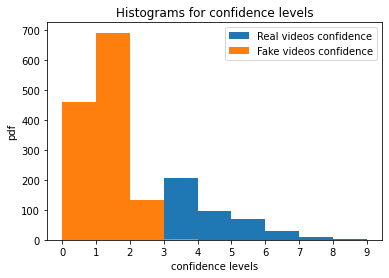

In [ ]:
fig,ax=plt.subplots(1,1)

ax.hist(ntc, bins = [0,1,2,3,4,5,6,7,8,9])
ax.hist(tamp_conf, bins = [0,1,2,3,4,5,6,7,8,9])
ax.set_title("Histograms for confidence levels")
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xlabel('confidence levels')
ax.set_ylabel('pdf')
plt.legend(['Real videos confidence', 'Fake videos confidence'])
plt.show()

Observation:

we can observe clearly that lower values of confidence are for tampered/fake videos and higher values of confidence are for real/non-tampered videos. So we can clearly classify them into real or fake on the basis of confidence values.

In [ ]:
# combining tampered and non tampered confidences

conf=[]
for i in ntc:
  conf.append(i)
for i in tamp_conf:
  conf.append(i)
len(conf)

1717

In [ ]:
# true labels for tampered and non tampered videos

true_label=[1 for i in range(430)]
true_labe=[0 for i in range(1287)]

y_true=true_label+true_labe
len(y_true)

1717

In [ ]:
# finding threshold to classify real or fake. Checking values between 2 to 4.

threshold=[]
for i in conf:
  if i>2 and i<4:
    threshold.append(i)
print(len(threshold))
threshold.sort()

360


In [ ]:
recall_metric=[]
pr=[]
for i in threshold:
  pred=[]
  for j in conf:
    if j>i:
      pred.append(1)
    else:
      pred.append(0)
  recall_metric.append(sm.recall_score(y_true, pred))
  pr.append(sm.precision_score(y_true, pred))


In [ ]:
max(pr),np.argmax(pr)

(1.0, 354)

In [ ]:
threshold[354]

3.8912553787231445

We can use '3.8912553787231445' as the threshold value, also from above graph we can see 3.5 can be the good threshold point. So will check with both and compare which threshold is better.

In [ ]:
y_pred=[]
for i in conf:
  if i>threshold[354]:
    y_pred.append(1)
  else:
    y_pred.append(0)

print(sm.accuracy_score(y_true, y_pred))
print(sm.f1_score(y_true, y_pred))
print(sm.precision_score(y_true, y_pred))
print(sm.recall_score(y_true, y_pred))   
print(sm.roc_auc_score(y_true, y_pred))
sm.confusion_matrix(y_true, y_pred)

0.8730343622597554
0.660436137071651
1.0
0.4930232558139535
0.7465116279069768


array([[1287,    0],
       [ 218,  212]])

In [ ]:
y_pred=[]
for i in conf:
  if i>3.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


print(sm.accuracy_score(y_true, y_pred))
print(sm.f1_score(y_true, y_pred))
print(sm.precision_score(y_true, y_pred))
print(sm.recall_score(y_true, y_pred))   
print(sm.roc_auc_score(y_true, y_pred))
sm.confusion_matrix(y_true, y_pred)

0.9225393127548049
0.8175582990397806
0.9966555183946488
0.6930232558139535
0.8461231275184763


array([[1286,    1],
       [ 132,  298]])

as we can see we are getting better results with 3.5 as threshold, so will take it as the threshold. I got 0.817 as f1 score, which is pretty good.

# chunks for live video feed

If you are using live streaming of video, can create 4 sec of chunks of videos. And then can process those chunks as we did before and then check if video is tampered or not. 

To create 4 sec chunk, ffmpeg command is below.

In [ ]:
vid='/content/gdrive/My Drive/Free English Lessons.mp4'

In [ ]:
#https://medium.com/@taylorjdawson/splitting-a-video-with-ffmpeg-the-great-mystical-magical-video-tool-%EF%B8%8F-1b31385221bd

command='ffmpeg -i "/content/gdrive/My Drive/Free English Lessons.mp4" -c:v libx264 -crf 22 -map 0 -segment_time 4 -reset_timestamps 1 -g 25 -sc_threshold 0 -force_key_frames "expr:gte(t,n_forced*1)" -f segment output%03d.mp4'
os.system(command)

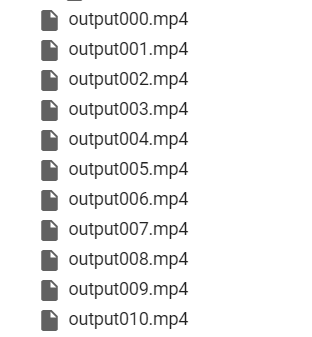

# Future work

Here we are trying to do transfer learning and make a contrastive loss function and then we can train it.

## processing videos for featurization

In [ ]:
# processing non tampered videos to get features

non_tamp_video_files=os.listdir('/content/gdrive/My Drive/vidtimit_videos/non_tampered')

non_tamp_vid_features=[]
non_tamp_aud_features=[]
for file in non_tamp_video_files:
  video='/content/gdrive/My Drive/vidtimit_videos/non_tampered/'+non_tamp_video_files[file]
  user=video.split('_')[2]
  user=user.split('/')[1]
  au=video.split('_')[-1]
  au=au.split('.')[0]

  video_fea=video_processing(video)
  non_tamp_vid_features.append(video_fea)
  audio_fea=audio_processing('/content/gdrive/My Drive/VIDTIMIT/'+user+'/audio/'+au+'.wav',False)
  non_tamp_aud_features.append(audio_fea)
  

In [ ]:
# processing tampered videos to get features

tamp_video_files=os.listdir('/content/gdrive/My Drive/vidtimit_videos/tampered')

tamp_vid_fea=[]
tamp_aud_fea=[]

c=0
for file in tamp_video_files:
  c=c+1
  video='/content/gdrive/My Drive/vidtimit_videos/tampered/'+tamp_video_files[file]
  user=video.split('_')[2]
  au=video.split('_')[-1]
  au=au.split('.')[0]

  video_fea=video_processing(video)
  tamp_vid_fea.append(video_fea)
  audio_fea=audio_processing('/content/gdrive/My Drive/VIDTIMIT/'+user+'/audio/'+au+'.wav',False)
  tamp_aud_fea.append(audio_fea)
 

I am just trying to featurize few samples  from tampered and non tampered videos, and will check the model with these sample features. Complete processing of all videos takes nearly 6-8 hours.

In [ ]:
non_tamp_aud_features=np.array(non_tamp_aud_features)
non_tamp_aud_features.shape,non_tamp_aud_features[0].shape

((10,), (17, 12, 20, 1))

In [ ]:
non_tamp_vid_features = np.array(non_tamp_vid_features)
non_tamp_vid_features.shape, non_tamp_vid_features[0].shape

((10,), (17, 112, 112, 5))

In [ ]:
# combining non tampered and tampered features, so we can pass to the model

label=[]
video_fea=[]
audio_fea=[]

for i in range(len(non_tamp_vid_features)):
  video_fea.append(non_tamp_vid_features[i])
  audio_fea.append(non_tamp_aud_features[i])
  t=[]
  for j in range(31):
    t.append(1)
  label.append(t)
  video_fea.append(tamp_vid_fea[i])
  audio_fea.append(tamp_aud_fea[i])
  t=[]
  for j in range(31):
    t.append(0)
  label.append(t)

label=np.array(label)
audio_fea=np.array(audio_fea)
video_fea=np.array(video_fea)

## tf records

I tried using tf.data.Dataset directly with audio and video features, but as depth is not fixed for all videos. It'll give ValueError. So I used tf records as shown below.

In [22]:
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow_addons as tfa

In [23]:
# https://stackoverflow.com/questions/47861084/how-to-store-numpy-arrays-as-tfrecord?rq=1

In [24]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))): # if value is tensor
        value = value.numpy() # get value of tensor
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def serialize_array(array):
  array = tf.io.serialize_tensor(array)
  return array

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=value))


In [33]:
# writing tfrecords

filename = '/content/gdrive/My Drive/features/features.tfrecords'  # address to save the TFRecords file
writer = tf.io.TFRecordWriter(filename)

for i in range(len(audio_fea)):
    serialized_audio = serialize_array(audio_fea[i])
    serialized_video = serialize_array(video_fea[i])
    s_label = serialize_array(label[i])

    feature = {"audio" : _bytes_feature(serialized_audio),
               "video" : _bytes_feature(serialized_video),
               "label" : _bytes_feature(s_label)}

    example = tf.train.Example(features=tf.train.Features(feature=feature))
    writer.write(example.SerializeToString())

writer.close()
sys.stdout.flush()

In [40]:
# Reading TFRecord file

def _parse_tfr_element(ele):
  parse_dic = {
    'audio': tf.io.FixedLenFeature([], tf.string), 
    'video': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.string)
    }
  example_message = tf.io.parse_single_example(ele, parse_dic)

  audio = example_message['audio'] # get byte string
  video = example_message['video']
  label = example_message['label']

  audio_feature = tf.io.parse_tensor(audio, out_type=tf.float64) 
  video_feature = tf.io.parse_tensor(video, out_type=tf.float64) 
  labels = tf.io.parse_tensor(label, out_type=tf.int64)

  return audio_feature, video_feature, labels


tfr_dataset = tf.data.TFRecordDataset('/content/gdrive/My Drive/features/features.tfrecords') 
for serialized_instance in tfr_dataset:
  print(serialized_instance)

dataset = tfr_dataset.map(_parse_tfr_element)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
# another function to make the dataset:

# reference - https://keras.io/examples/keras_recipes/tfrecord/

from functools import partial
FILENAMES = tf.io.gfile.glob( "/content/gdrive/My Drive/features/features.tfrecords")
AUTOTUNE = tf.data.experimental.AUTOTUNE

def read_tfrecord(ele):
    tfrecord_format = (
        {
            'audio': tf.io.FixedLenFeature([], tf.string), 
            'video': tf.io.FixedLenFeature([], tf.string),
            'label': tf.io.FixedLenFeature([], tf.string)
        }
        
    )

    example_message = tf.io.parse_single_example(ele, tfrecord_format)

    audio = example_message['audio'] # get byte string
    video = example_message['video']
    label = example_message['label']

    audio_feature = tf.io.parse_tensor(audio, out_type=tf.float64) 
    video_feature = tf.io.parse_tensor(video, out_type=tf.float64) 
    labels = tf.io.parse_tensor(label, out_type=tf.int64) 
    return audio_feature,video_feature, labels


ignore_order = tf.data.Options()
ignore_order.experimental_deterministic = False  # disable order, increase speed
dataset = tf.data.TFRecordDataset(FILENAMES)  # automatically interleaves reads from multiple files
dataset = dataset.with_options(ignore_order)  # uses data as soon as it streams in, rather than in its original order
DataSet = dataset.map(partial(read_tfrecord), num_parallel_calls=AUTOTUNE)

In [28]:
# DataSet is working fine

for i,j,k in DataSet:
  print(i.shape,j.shape)
  print(k.shape)
  break


(17, 12, 20, 1) (17, 112, 112, 5)
(31,)


## training

In [29]:
# distance functions in tf

def euclidean_distance_loss(y_true, y_pred):
    ''' using tensorflow implementation to calculate distance '''

    dists = tf.linalg.norm(y_pred - y_true, axis=1)
    return dists

def distance_euc_tf(feat1, feat2, vshift=15):
  ''' takes 2 tensors as input and return euclidian distance between those '''
  
  win_size = vshift*2+1
  paddings = tf.constant([[vshift, vshift+1,], [0, 0]])
  feat2p = tf.pad(feat2, paddings, "CONSTANT")              # padding for feat2
  
  if len(feat2p) < len(feat1)+win_size:
    # after padding in feat2, if still not getting enough rows to calculate distance in below for loop, we have to pad 'n' more rows

    n = len(feat1)+win_size-len(feat2p)
    padd = tf.constant([[0, n,], [0, 0]])
    feat2p = tf.pad(feat2p, padd, "CONSTANT")

  dists = []

  # we have to create pairwise distance, so running below for loop so it'll calculate distance of every row of feat1 with every 31 rows sample of feat2p

  for i in range(0,len(feat1)):
    a=tf.repeat([feat1[i,:]], win_size, axis=0)
    b=feat2p[i:i+win_size,:]
    dists.append(euclidean_distance_loss(a, b))

  mdist = np.mean(np.stack(dists,1),1)     # mdist will be array of 31 values
  mdist = tf.convert_to_tensor(mdist)
  return mdist

In [30]:
def loss_function(y_true, pred_dist):
  ''' calculates contrastive loss between true and predictive values '''

  e=0
  for i in range(31):
    e = e + (y_true[i]*(pred_dist[i])**2) + ((1-y_true[i])*max(1-pred_dist[i],0)**2)
  loss = e/(2*31)
  
  return loss

In [41]:
# checking the functions

video='/content/gdrive/My Drive/vidtimit_videos/non_tampered/fadg0_sa1.mp4'
user=video.split('_')[2]
user=user.split('/')[1]
au=video.split('_')[-1]
au=au.split('.')[0]

video_fea=video_processing(video)
audio_fea=audio_processing('/content/gdrive/My Drive/VIDTIMIT/'+user+'/audio/'+au+'.wav',False)
print('video and audio features respectively :',video_fea.shape,audio_fea.shape)

audio_pred = model[0].predict(audio_fea)
lip_pred = model[1].predict(video_fea)
print('video predicted shape',lip_pred.shape)
print('audio predicted shape',audio_pred.shape)
print()
d = distance_euc_tf(lip_pred, audio_pred)
print('distance :',d)
print()
conf = np.median(d)-min(d)
print('confidence is :',conf)

y_true=[1 for i in range(31)]
l=loss_function(y_true,d)
print('loss value :',l)

video and audio features respectively : (23, 112, 112, 5) (23, 12, 20, 1)
video predicted shape (23, 128)
audio predicted shape (23, 128)

distance : tf.Tensor(
[13.451019  13.3574295 13.093312  12.782899  12.573195  12.471448
 12.321617  12.14698   12.0412    11.753709  11.774637  11.308606
 11.127702  11.001187  10.640835  10.597815  10.762457  11.083251
 11.310944  11.336828  11.565127  11.754389  11.873314  11.899182
 12.156877  12.286059  12.592563  12.66416   12.948493  13.034859
 13.161225 ], shape=(31,), dtype=float32)

confidence is : tf.Tensor(1.4433851, shape=(), dtype=float32)
loss value : tf.Tensor(72.666695, shape=(), dtype=float32)


### new model

In [50]:
model[0].trainable = False
model[1].trainable = False

In [51]:
# new model for transfer learning: I'm just adding one customize layer as distance function and then using contrastive loss function, one can use "tfa.losses.ContrastiveLoss" also

x1 = model[0].output
x2 = model[1].output

l1 = tf.keras.layers.Lambda(lambda x: distance_euc_tf, input_shape=(None, 128), output_shape=(31,))([x1,x2])

new_model = Model(inputs = [model[0].input,model[1].input], outputs=l1)

new_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=loss_function)

In [52]:
for layer in model[0].layers:
  layer.trainable = False
for layer in model[1].layers:
  layer.trainable = False

In [51]:
print(new_model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1_lip_input (InputLayer)    [(None, 112, 112, 5) 0                                            
__________________________________________________________________________________________________
conv1_audio_input (InputLayer)  [(None, 12, 20, 1)]  0                                            
__________________________________________________________________________________________________
conv1_lip (Conv2D)              (None, 110, 110, 96) 4416        conv1_lip_input[0][0]            
__________________________________________________________________________________________________
conv1_audio (Conv2D)            (None, 12, 20, 64)   640         conv1_audio_input[0][0]          
_______________________________________________________________________________________

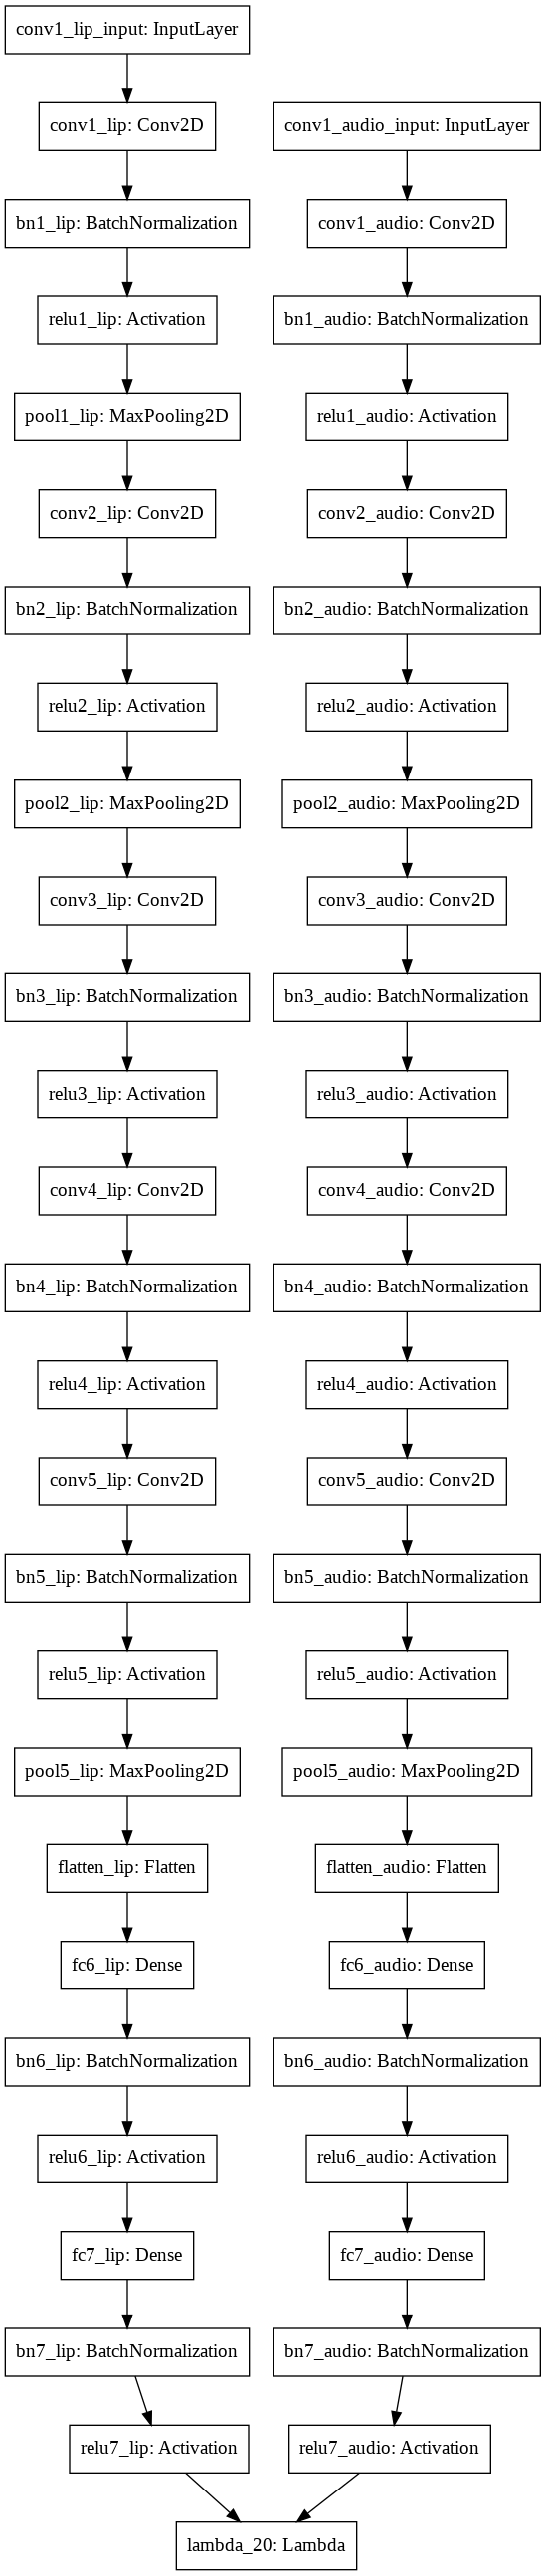

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(new_model, to_file='model_struct.png')


To train this model, we need same first dimension which we don't have in our case. 
So I was getting ValueError: Data cardinality is ambiguous: Please provide data which shares the same first dimension.

So if someone interested, can give it a try with tf.gradients

### transfer learning without new model

In [31]:
for layer in model[0].layers:
  layer.trainable = False
for layer in model[1].layers:
  layer.trainable = False

In [32]:
for i in range(len(model[0].layers),18,-1):
  model[0].layers[i-1].trainable = True
  print(model[0].layers[i-1].trainable, model[0].layers[i-1])


True <tensorflow.python.keras.layers.core.Activation object at 0x7fdca3d57470>
True <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fdca3d51780>
True <tensorflow.python.keras.layers.core.Dense object at 0x7fdca3d34390>
True <tensorflow.python.keras.layers.core.Activation object at 0x7fdca3d28da0>
True <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fdca3d28860>
True <tensorflow.python.keras.layers.core.Dense object at 0x7fdca3d285c0>


In [33]:
for i in range(len(model[1].layers),19,-1):
  model[1].layers[i-1].trainable = True
  print(model[1].layers[i-1].trainable, model[1].layers[i-1])

True <tensorflow.python.keras.layers.core.Activation object at 0x7fdca3e568d0>
True <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fdca3e4fbe0>
True <tensorflow.python.keras.layers.core.Dense object at 0x7fdca3e31518>
True <tensorflow.python.keras.layers.core.Activation object at 0x7fdca3e31080>
True <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fdca3e28a58>
True <tensorflow.python.keras.layers.core.Dense object at 0x7fdca3e28f60>


In [35]:
len(model[0].trainable_variables) , len(model[1].trainable_variables)

(8, 8)

In [36]:
trainable_variables_list = model[0].trainable_variables + model[1].trainable_variables
len(trainable_variables_list)

16

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer
# https://stackoverflow.com/questions/59731667/why-does-training-using-tf-gradienttape-in-tensorflow-2-have-different-behavior
# https://www.tensorflow.org/api_docs/python/tf/GradientTape

cnt=0
for input1, input2, label in DataSet:
    for i in range(1):
        cnt=cnt+1
        print('Running round',cnt)
        
        with tf.GradientTape() as tape:
            tape.watch([input1,input2])
            pr1=model[0](input1, training=True)
            pr2=model[1](input2, training=True)
            prediction=distance_euc_tf(pr2,pr1)
            
            prediction=tf.cast(prediction,np.int64)     # have to convert to int64 because of error "InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a int64 tensor but is a float tensor [Op:Mul]"
            loss_value = loss_function(label,prediction)

        grads = tape.gradient(loss_value, trainable_variables_list)
        optimizer = tf.keras.optimizers.Adam()
        optimizer.apply_gradients(zip(grads, trainable_variables_list))

Here I have used customized distance function and loss function. So due to gradient issue I'm not able to train the model. Because not everything is differentiable in my functions. But it can totally be differentiable and trainable if someone use proper tensorflow implementation. So I'm leaving it as the future work. This is the improvement anyone can do in future refering this notebook.

# Summary

1. First I created tampered and non tampered videos from the VIDTIMIT dataset, where we have 43 users. I created 30 tampered videos per user and 10 non-tampered videos per user.

2. Then I'm trying to apply syncnet model (https://www.robots.ox.ac.uk/~vgg/publications/2016/Chung16a/chung16a.pdf), with that dataset to classify videos as real (non-tampered == 1) or fake (tampered == 0). So it's a classification problem with 2 classes.

3. Then for audio and video featurization, I have taken processing functions from "https://github.com/voletiv/syncnet-in-keras". From videos we are detecting face and mouth, then taking rectangle coordinated of mouth and preparing the video features. And for audio featurization we are using MFCC features.

4. Then for model, we have two models (one for audio and one for video), again for all the functions I took from the mentioned link. And we are using pre-trained weights here.

5. Then I passed audio features to model[0] and video features to model[1], and got final predicted respective arrays.

6. Then for classification I calculated euclidean distance between those arrays. From the distance function we'll get 31 valued array. From that we have to find confidence for the video. Confidence is difference between median and min value. 

7. At last with all confidence values, I found the threshold value for classification of real and fake videos.

8. I got pretty good results. I got roc auc score as 0.8461231275184763.

9. Then I showed how to make chunks from a bigger video.

10. Then in last section (future work), I tried to make a model for transfer learning. If anyone interested wants to train the syncnet model as per requirements, can run that model. I used tf records to make dataset. And for training tf.GradientTape(). I made custom functions for distance and loss function. 